Predictions: {'inference_id': 'eb84b34a-7b4a-4545-92b6-31264b459b27', 'time': 0.15146290299981047, 'image': {'width': 1920, 'height': 1090}, 'predictions': [{'x': 779.5, 'y': 461.5, 'width': 119.0, 'height': 137.0, 'confidence': 0.8296469449996948, 'class': 'knife', 'class_id': 1, 'detection_id': '999e0e9f-f040-4ae6-898d-bd9f56a6d04c'}]}
Detected Weapons: knife (0.83)


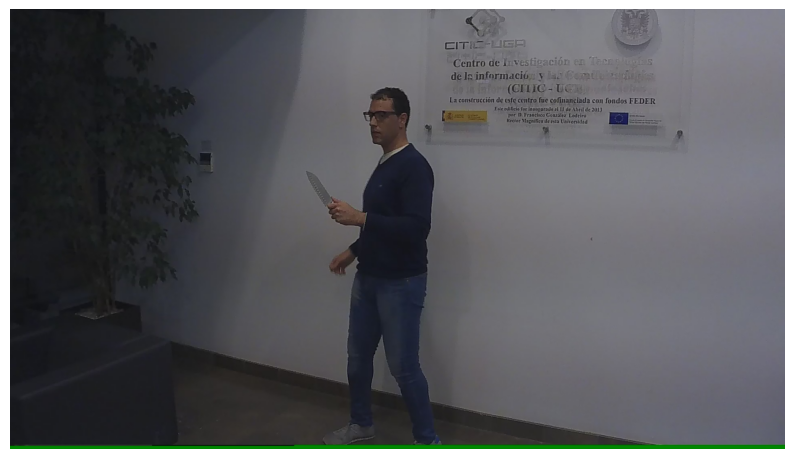

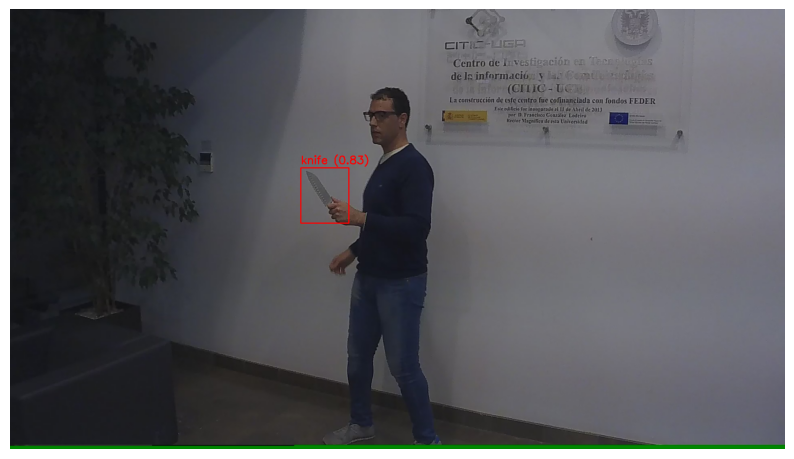

In [ ]:
import requests
import cv2
import matplotlib.pyplot as plt


api_key = "fhDjBYYXtb8LU6UZ1MOT"
project_name = "weapon-detection-z5vft"
model_version = "weapon-detection-z5vft/1"

url = f"https://detect.roboflow.com/{model_version}?api_key={api_key}"

image_path = "ABbframe00166.jpg"
with open(image_path, "rb") as image_file:
    response = requests.post(url, files={"file": image_file})

if response.status_code == 200:
    predictions = response.json()

    print("Predictions:", predictions)

    if predictions.get("predictions", []):
        detected_weapons = []
        for prediction in predictions["predictions"]:
            label = prediction["class"]
            confidence = prediction["confidence"]
            if confidence > 0.5:
                detected_weapons.append(f"{label} ({confidence:.2f})")

        if detected_weapons:
            print(f"Detected Weapons: {', '.join(detected_weapons)}")
        else:
            print("No weapon detected.")
    else:
        print("No weapon detected.")


    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')

    for prediction in predictions.get("predictions", []):

        x = int(prediction["x"] - prediction["width"] / 2)
        y = int(prediction["y"] - prediction["height"] / 2)
        w = int(prediction["width"])
        h = int(prediction["height"])
        label = prediction["class"]
        confidence = prediction["confidence"]

        if confidence > 0.5:
            image_rgb = cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

            image_rgb = cv2.putText(image_rgb, f"{label} ({confidence:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

else:
    print(f"Error: API returned status code {response.status_code}")
    print("Response Content:", response.text)
